# Master Thesis
## ( Real Time Tumor Tracking Using Fast MRI and Computer Vision )

#### Romain Pattyn

### 1. Imports and function declarations

In [5]:
import os
import cv2
import sys 
import time
import importlib
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video, HTML

sys.path.append(os.path.abspath("./../"))

from ImageProcessing import GET_NAVIGATORS
from ImageProcessing import GET_REGIONS
import ImageProcessing as IP

def reload_library():
    importlib.reload(IP)
    print("Library reloaded") 

### 2. Loading Data

In [7]:
def getDataSequences(data_path):
    with open(data_path, 'rb') as handle:
        images = pkl.load(handle)
    return images

MRI_images = getDataSequences("./data/MRI_images.p")
CT_images = getDataSequences("./data/CT_images.p")

### 3. Similar Regions Identification

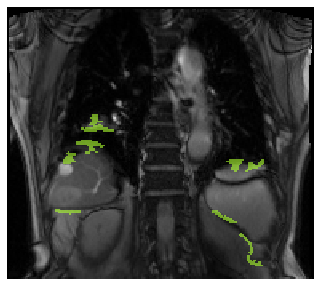

(<Figure size 576x360 with 1 Axes>,
 (-0.5, 191.5, 169.5, -0.5),
 None)

In [14]:
binary_mask, point_coord = GET_REGIONS(MRI_images, CT_images)

h, w = point_coord.T
ref_img = cv2.cvtColor(MRI_images[0].copy(), cv2.COLOR_GRAY2RGB)
img = ref_img.copy()
img[h, w] = np.array([173, 255, 47])
img = cv2.addWeighted(img, 0.6, ref_img, 1 - 0.6, 0)

plt.figure(figsize=(8, 5)), plt.imshow(img), plt.axis("off"), plt.show()

### 4. Navigator Identification

In [13]:
for ((x1, y1), (x2, y2)) in GET_NAVIGATORS(MRI_images, CT_images):
    print("From ({0}, {1})\tto ({2}, {3})".format(x1, y1, x2, y2))

From (56, 69)	to (55, 79)
From (52, 81)	to (51, 91)
From (42, 97)	to (35, 91)
From (145, 102)	to (140, 93)
From (157, 103)	to (153, 94)
From (38, 122)	to (37, 132)
From (137, 126)	to (133, 135)
From (157, 151)	to (147, 155)


### 5. VideoVieuwer Example

In order to modify the VideoVieuwer, we need to have a reference to the ImageProcessing class that is created. This is why we explicitely create a class, and do the call to get_navigators() ourselves. The function GET_NAVIGATORS() automatises the creation of the class en the call to the function because we only need the navigators coordinates.

In [10]:
reload_library()
DataSet = IP.ImageProcessing(MRI_images[10:], CT_images)
DataSet.get_navigators()

DataSet.vv_deactivate_layer('flow')
DataSet.vv_change_layer_opacity('following_points', 0.5)

video_path = "./video/example.mp4"
DataSet.export_video(video_path, slower=3)

Video(video_path)

Library reloaded
